In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kwant
import scipy.sparse.linalg as sla
import scipy.sparse as sp


In [221]:
# create a graphene nanoribbon
def make_graphene_nanoribbon(W=10, L=30):
    lat = kwant.lattice.honeycomb(a = 1.0, norbs = 1)
    syst = kwant.Builder()

    def ribbon_shape(pos):
        (x, y) = pos
        return 0.1 <= y < W and 0 <= x < L

    def onsite(site):
        return 0

    def nn_hoppings(site1, site2, t=1.0):
        return t

    def nnn_hoppings(site1, site2, t_prime=0.1):
        return 1j*t_prime

    syst[lat.shape(ribbon_shape, (0, 0))] = onsite
    syst[lat.neighbors()] = nn_hoppings
    syst[lat.neighbors(n=2)] = nnn_hoppings

    leads = kwant.Builder(kwant.TranslationalSymmetry((-1, 0)))
    leads[lat.shape(ribbon_shape, (0, 0))] = onsite
    leads[lat.neighbors()] = nn_hoppings
    leads[lat.neighbors(n=2)] = nnn_hoppings
    syst.attach_lead(leads)
    syst.attach_lead(leads.reversed())


    return syst.finalized()

In [222]:
graphene_nr = make_graphene_nanoribbon(10, 50)

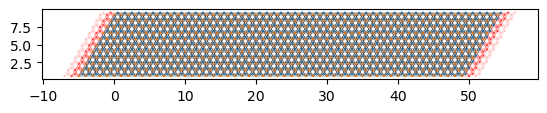

In [223]:
kwant.plot(graphene_nr)
plt.show()

In [224]:
h = graphene_nr.hamiltonian_submatrix(sparse=True).tocsc()
N = h.shape[0]
print(N)

1210


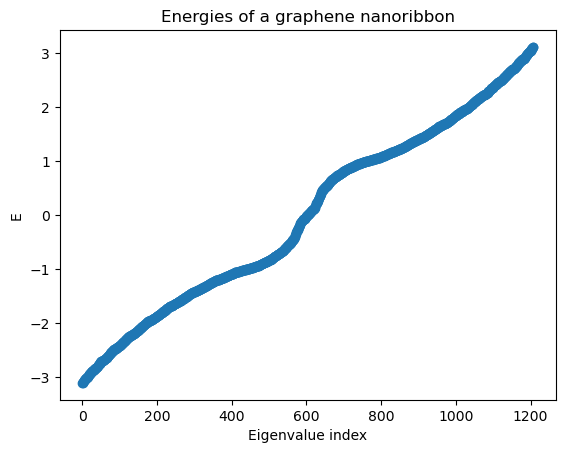

In [225]:
eigenvalues, eigenvectors = sla.eigsh(h, k=N-2, which='SM')
eigenvectors = eigenvectors.T
to_sort = np.argsort(eigenvalues)
eigenvalues = eigenvalues[to_sort]
eigenvectors = eigenvectors[to_sort]
plt.scatter(range(N-2), eigenvalues)
plt.xlabel('Eigenvalue index')
plt.ylabel('E')
plt.title('Energies of a graphene nanoribbon')
plt.show()

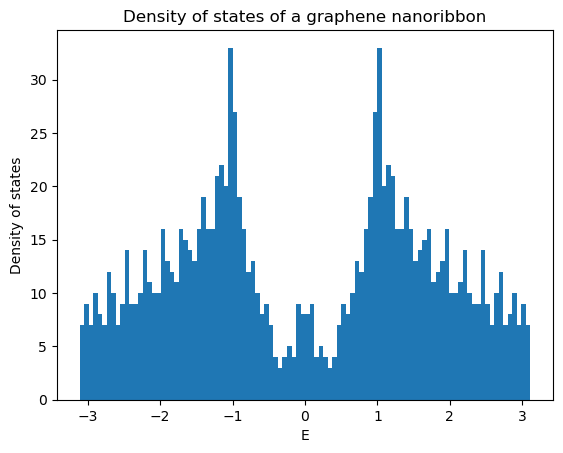

In [226]:
plt.hist(eigenvalues, bins=100)
plt.xlabel('E')
plt.ylabel('Density of states')
plt.title('Density of states of a graphene nanoribbon')
plt.show()

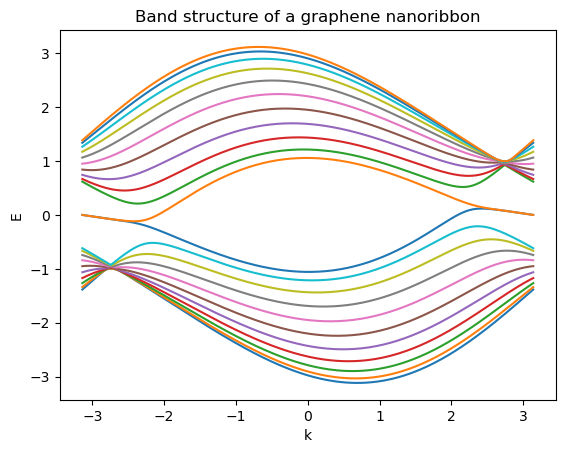

In [227]:
wave_function = kwant.plotter.bands(graphene_nr.leads[0], momenta=np.linspace(-np.pi, np.pi, 256), show=False)
# plt.plot(np.linspace(-np.pi, np.pi, 256), wave_function)
plt.xlabel('k')
plt.ylabel('E')
plt.title('Band structure of a graphene nanoribbon')
plt.show()

In [231]:
psi = kwant.solvers.default.wave_function(graphene_nr, energy=0)

In [246]:
psi(0)

array([[ 3.20834272e-01+3.49817037e-02j,  1.66831520e-14+2.30162149e-15j,
        -1.39702611e-02-1.52322734e-03j, ...,
         1.52322734e-03-1.39702611e-02j, -7.48384102e-15+2.19842720e-14j,
        -3.49817038e-02+3.20834273e-01j],
       [-2.98224757e-01-1.23368384e-01j,  8.68753998e-15+7.09226162e-15j,
         1.29960330e-02+5.37614515e-03j, ...,
         5.37614512e-03-1.29960329e-02j,  5.11558191e-15-4.95556441e-15j,
        -1.23368383e-01+2.98224755e-01j]])

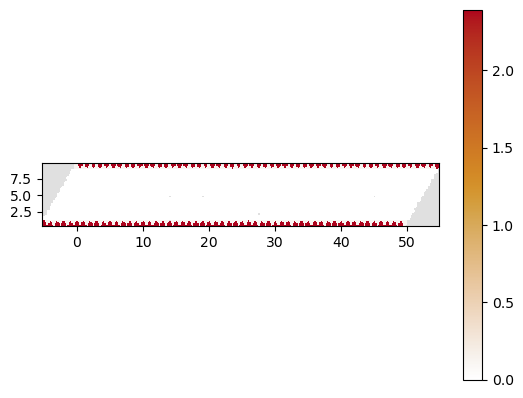

In [245]:
kwant.plotter.map(graphene_nr, np.abs(psi(0)[0])**2, oversampling=3)
# plt.title('Wave function intensity')
plt.show()

E = [-2.98224757e-01-1.23368384e-01j  8.68753998e-15+7.09226162e-15j
  1.29960330e-02+5.37614515e-03j ...  5.37614512e-03-1.29960329e-02j
  5.11558191e-15-4.95556441e-15j -1.23368383e-01+2.98224755e-01j]


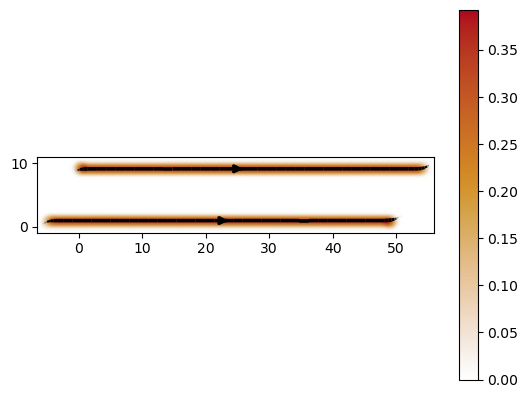

In [244]:
J = kwant.operator.Current(graphene_nr)
current = J(psi(0)[1])
print('E = ' + str(psi(0)[1]))
kwant.plotter.current(graphene_nr, current)
plt.show()

In [ ]:
# def nnn_hopping(site1, site2, t_2):
#     return 1j * t_2

# def onsite(site, m):
#     return m * (1 if site.family == a else -1)

# def add_hoppings(syst):
#     syst[graphene.neighbors(1)] = 1
#     syst[[kwant.builder.HoppingKind(*hopping) for hopping in nnn_hoppings]] = nnn_hopping